In [1]:
import pandas as pd
import json
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
import multiprocessing
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

2022-03-10 19:08:51.862022: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
data=pd.read_csv('rc_card_polygon_data.csv')

In [3]:
data

,file_name,class,Width,Height,xmin,ymin,xmax,ymax,visibility,meta,class_id,case_id,image_id,visibility.1,polygon,id
0,1cd90041-b111-4063-b576-6d549c15d210_817440.jpg,RC,1920,1080,215,163,1566,958,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,1cd90041-b111-4063-b576-6d549c15d210,817440,around_75,"[{""x"": 294.9794238683128, ""y"": 208.06584362139...",5398148
1,1cd90041-b111-4063-b576-6d549c15d210_817439.jpg,RC,1920,1080,205,134,1659,985,around_50,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,1cd90041-b111-4063-b576-6d549c15d210,817439,around_50,"[{""x"": 287.0781893004115, ""y"": 165.92592592592...",5398147
2,1cd90041-b111-4063-b576-6d549c15d210_817438.jpg,RC,1920,1080,214,164,1491,979,fully_visible,"{""state"": ""Haryana"", ""documentSide"": ""Front"", ...",1,1cd90041-b111-4063-b576-6d549c15d210,817438,fully_visible,"[{""x"": 229.908592321755, ""y"": 203.583180987202...",5398146
3,1cd90041-b111-4063-b576-6d549c15d210_817437.jpg,RC,1920,1080,540,301,1400,838,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,1cd90041-b111-4063-b576-6d549c15d210,817437,around_75,"[{""x"": 551.0786106032906, ""y"": 328.19012797074...",5398145
4,1cd90041-b111-4063-b576-6d549c15d210_817436.jpg,RC,1920,1080,489,238,1333,800,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""back"", ""do...",1,1cd90041-b111-4063-b576-6d549c15d210,817436,fully_visible,"[{""x"": 542.3034734917733, ""y"": 257.98903107861...",5398141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg,RC,1920,1080,406,222,1417,862,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,861ba1d1-2060-4ba0-9c84-12ed7b20269b,822223,around_75,"[{""x"": 406.7163288040666, ""y"": 281.14789748033...",5310605
4911,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg,RC,1920,1080,454,273,1249,783,around_75,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,861ba1d1-2060-4ba0-9c84-12ed7b20269b,822222,around_75,"[{""x"": 454.39844800936464, ""y"": 303.3995531094...",5310593
4912,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg,RC,1920,1080,381,146,1597,921,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,861ba1d1-2060-4ba0-9c84-12ed7b20269b,822221,fully_visible,"[{""x"": 416.25275264512624, ""y"": 193.7306789372...",5310582
4913,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg,RC,1920,1080,230,112,1533,916,fully_visible,"{""state"": ""Delhi"", ""documentSide"": ""Front"", ""d...",1,861ba1d1-2060-4ba0-9c84-12ed7b20269b,822220,fully_visible,"[{""x"": 293.86864668486135, ""y"": 157.1743875465...",5310574


In [4]:
df = pd.DataFrame(columns=['file_name', 'label'])

In [5]:
for i in range(len(data)):
    lab = []
    image_name = data["file_name"][i]
    image_path = 'multi_class_images/'+image_name
    image = cv2.imread(image_path)
    if image is not None:
        
        print(image_name)
        meta = data["meta"][i]
        res = json.loads(meta)
        res1 = res['documentSide']
        res2 = res['documentRcType']
        lab.append(res1)
        lab.append(res2)
        print(res1, res2)
        df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817437.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817436.jpg
back Card
1cd90041-b111-4063-b576-6d549c15d210_817435.jpg
back Card
1cd90041-b111-4063-b576-6d549c15d210_817434.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817433.jpg
Front Card
1cd90041-b111-4063-b576-6d549c15d210_817432.jpg
back Card
1cd90041-b111-4063-b576-6d549c15d210_817431.jpg
Front Card
b556a761-5dcd-4fe9-82bf-427e182c1c58_817430.jpg
Front Card
b556a761-5dcd-4fe9-82bf-427e182c1c58_817429.jpg
Front Page
b556a761-5dcd-4fe9-82bf-427e182c1c58_817428.jpg
Front Page
b556a761-5dcd-4fe9-82bf-427e182c1c58_817427.jpg
Front Card
b556a761-5dcd-4fe9-82bf-427e182c1c58_817426.jpg
Front Card
b556a761-5dcd-4fe9-82bf-427e182c1c58_817425.jpg
back Card
b556a761-5dcd-4fe9-82bf-427e182c1c58_817424.jpg
Front Page
b

5133442a-8253-416e-9fa6-9848bc5ef2d6_817590.jpg
Front Card
5133442a-8253-416e-9fa6-9848bc5ef2d6_817589.jpg
Front Card
5133442a-8253-416e-9fa6-9848bc5ef2d6_817587.jpg
Front Page
5133442a-8253-416e-9fa6-9848bc5ef2d6_817585.jpg
back Card
5133442a-8253-416e-9fa6-9848bc5ef2d6_817584.jpg
Front Page
5133442a-8253-416e-9fa6-9848bc5ef2d6_817583.jpg
Front Page
5133442a-8253-416e-9fa6-9848bc5ef2d6_817582.jpg
Front Page
5133442a-8253-416e-9fa6-9848bc5ef2d6_817581.jpg
Front Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817637.jpg
back Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817639.jpg
Front Page
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817638.jpg
Front Page
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817640.jpg
Front Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817636.jpg
Front Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817635.jpg
Front Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817634.jpg
Front Card
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817633.jpg
Front Page
ddcf53ae-5da1-44cd-94ae-2a60e81915b5_817632.jpg
Front Page

e1879dc1-d4b3-47b3-94d6-04eb58149807_817641.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817750.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817749.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817748.jpg
Front Page
d550de13-8828-40db-9312-db11bac6fb8b_817747.jpg
Front Page
d550de13-8828-40db-9312-db11bac6fb8b_817746.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817745.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817744.jpg
Front Page
d550de13-8828-40db-9312-db11bac6fb8b_817743.jpg
Front Card
d550de13-8828-40db-9312-db11bac6fb8b_817742.jpg
back Card
d550de13-8828-40db-9312-db11bac6fb8b_817741.jpg
Front Page
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817710.jpg
Front Card
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817709.jpg
Front Page
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817708.jpg
Front Card
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817707.jpg
Front Page
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817706.jpg
back Card
ba6d8091-dd88-4477-9d93-f6e6226c81d0_817705.jpg
Front Card

ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818088.jpg
Front Card
ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818086.jpg
Front Card
ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818085.jpg
Front Card
ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818084.jpg
Front Card
ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818083.jpg
Front Page
ec6aeea3-4457-42c8-8c0f-8bfaddae9e54_818081.jpg
Front Page
0cddde72-9722-47cb-bfb1-a06d0592837d_817970.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817961.jpg
Front Page
0cddde72-9722-47cb-bfb1-a06d0592837d_817964.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817969.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817963.jpg
Front Page
0cddde72-9722-47cb-bfb1-a06d0592837d_817968.jpg
Front Page
0cddde72-9722-47cb-bfb1-a06d0592837d_817967.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817966.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817965.jpg
Front Card
0cddde72-9722-47cb-bfb1-a06d0592837d_817962.jpg
Front Card
7ae040cf-f984-4967-a836-e906e17d79da_817830.jpg
Front Di

8c095f1f-39b5-462b-8e52-4af9a8acc91c_817792.jpg
Front Card
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817791.jpg
back Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818174.jpg
back Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818176.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818175.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818171.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818180.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818179.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818178.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818177.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818173.jpg
Front Card
0562dea9-2cc6-4c74-ac12-5827db9ec364_818172.jpg
Front Card
74a42164-c156-4443-a76c-c1fad6dfeabd_817859.jpg
Front Page
74a42164-c156-4443-a76c-c1fad6dfeabd_817860.jpg
Front Card
74a42164-c156-4443-a76c-c1fad6dfeabd_817857.jpg
back Card
74a42164-c156-4443-a76c-c1fad6dfeabd_817854.jpg
Front Card
74a42164-c156-4443-a76c-c1fad6dfeabd_817858.jpg
Front Page


703860fb-21da-487e-9885-582a6fe5f37b_818116.jpg
Front Page
703860fb-21da-487e-9885-582a6fe5f37b_818120.jpg
Front Card
703860fb-21da-487e-9885-582a6fe5f37b_818117.jpg
Front Card
703860fb-21da-487e-9885-582a6fe5f37b_818114.jpg
Front Card
703860fb-21da-487e-9885-582a6fe5f37b_818119.jpg
Front Page
703860fb-21da-487e-9885-582a6fe5f37b_818118.jpg
Front Page
703860fb-21da-487e-9885-582a6fe5f37b_818113.jpg
Front Page
703860fb-21da-487e-9885-582a6fe5f37b_818112.jpg
Front Card
703860fb-21da-487e-9885-582a6fe5f37b_818111.jpg
Front Page
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818265.jpg
back Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818270.jpg
Front Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818268.jpg
Front Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818269.jpg
Front Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818266.jpg
Front Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818264.jpg
Front Card
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818263.jpg
Front Page
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818262.jpg
Front Pag

afa2536f-cf8a-47bc-8be4-c2f04de97316_818251.jpg
Front Card
afa2536f-cf8a-47bc-8be4-c2f04de97316_818256.jpg
Front Card
afa2536f-cf8a-47bc-8be4-c2f04de97316_818260.jpg
Front Card
afa2536f-cf8a-47bc-8be4-c2f04de97316_818259.jpg
Front Card
afa2536f-cf8a-47bc-8be4-c2f04de97316_818257.jpg
Front Card
afa2536f-cf8a-47bc-8be4-c2f04de97316_818255.jpg
Front Page
afa2536f-cf8a-47bc-8be4-c2f04de97316_818253.jpg
Front Page
afa2536f-cf8a-47bc-8be4-c2f04de97316_818252.jpg
Front Page
075b0370-6d38-4735-a117-53e211426b47_818330.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818329.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818328.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818327.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818326.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818325.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818324.jpg
Front Page
075b0370-6d38-4735-a117-53e211426b47_818323.jpg
Front Card
075b0370-6d38-4735-a117-53e211426b47_818322.jpg
Front Ca

9675a159-a352-436d-869e-a731fded698e_818500.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818499.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818497.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818495.jpg
Front Page
9675a159-a352-436d-869e-a731fded698e_818494.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818493.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818492.jpg
Front Card
9675a159-a352-436d-869e-a731fded698e_818491.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818450.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818449.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818448.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818447.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818446.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818445.jpg
Front Page
a66786d7-b398-4104-be82-e4a22266fe44_818444.jpg
Front Page
a66786d7-b398-4104-be82-e4a22266fe44_818443.jpg
Front Card
a66786d7-b398-4104-be82-e4a22266fe44_818442.jpg
Front Pa

f4a5db7b-7477-4978-936b-a9e56d0dcc80_818487.jpg
Front Card
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818486.jpg
Front Card
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818485.jpg
Front Card
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818484.jpg
Front Page
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818483.jpg
Front Card
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818482.jpg
Front Card
f4a5db7b-7477-4978-936b-a9e56d0dcc80_818481.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818525.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818521.jpg
Front DigiLocker
57435577-fba7-4058-95c0-62ac62b9f38d_818530.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818529.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818528.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818527.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818526.jpg
Front Page
57435577-fba7-4058-95c0-62ac62b9f38d_818524.jpg
Front Card
57435577-fba7-4058-95c0-62ac62b9f38d_818523.jpg
Front Page
57435577-fba7-4058-95c0-62ac62b9f38d_818522.jpg
Fr

a0920dbb-07d7-4f31-98f5-b110afe15f3c_818807.jpg
Front Card
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818806.jpg
Front Card
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818805.jpg
Front Card
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818804.jpg
Front Card
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818802.jpg
Front Card
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818801.jpg
back Card
e88c8632-0f92-431f-8348-90afb420f26c_818798.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818797.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818800.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818799.jpg
Front Page
e88c8632-0f92-431f-8348-90afb420f26c_818796.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818795.jpg
Front Page
e88c8632-0f92-431f-8348-90afb420f26c_818794.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818793.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818792.jpg
Front Card
e88c8632-0f92-431f-8348-90afb420f26c_818791.jpg
Front Card
b0aeb020-8c55-4e31-9cb0-d37f8b48d551_818850.jpg
Front Car

61dc9e89-f417-4d86-9d49-3fcc5c902402_818979.jpg
Front Page
61dc9e89-f417-4d86-9d49-3fcc5c902402_818978.jpg
Front Card
61dc9e89-f417-4d86-9d49-3fcc5c902402_818977.jpg
back Card
61dc9e89-f417-4d86-9d49-3fcc5c902402_818976.jpg
Front Page
61dc9e89-f417-4d86-9d49-3fcc5c902402_818975.jpg
Front Page
61dc9e89-f417-4d86-9d49-3fcc5c902402_818974.jpg
Front Card
61dc9e89-f417-4d86-9d49-3fcc5c902402_818973.jpg
back Card
61dc9e89-f417-4d86-9d49-3fcc5c902402_818972.jpg
Front Page
61dc9e89-f417-4d86-9d49-3fcc5c902402_818971.jpg
Front Page
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818872.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818880.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818877.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818879.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818878.jpg
back Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818876.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818875.jpg
Front Card
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818874.jpg
Front Page


d9d995b5-f134-427d-9ae1-b655397f00cf_819035.jpg
Front Card
d9d995b5-f134-427d-9ae1-b655397f00cf_819034.jpg
Front Card
d9d995b5-f134-427d-9ae1-b655397f00cf_819033.jpg
Front Card
d9d995b5-f134-427d-9ae1-b655397f00cf_819032.jpg
Front Card
d9d995b5-f134-427d-9ae1-b655397f00cf_819031.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819080.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819079.jpg
Front Page
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819078.jpg
Front Page
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819077.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819076.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819075.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819074.jpg
Front Card
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819073.jpg
Front Page
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819071.jpg
Front Page
530d9b56-1dc5-4084-b410-6fdae46d632d_819054.jpg
Front Card
530d9b56-1dc5-4084-b410-6fdae46d632d_819051.jpg
Front Card
530d9b56-1dc5-4084-b410-6fdae46d632d_819056.jpg
Front Ca

5f1ca1d4-d781-4575-a98a-03b35af8e10b_819099.jpg
Front Card
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819097.jpg
Front Card
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819096.jpg
Front Card
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819095.jpg
Front Page
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819094.jpg
Front Card
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819093.jpg
Front Card
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819092.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819240.jpg
Front Page
14e555df-d3fb-45c5-b2f9-6797caf38417_819239.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819238.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819237.jpg
back Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819236.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819235.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819234.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819233.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819232.jpg
Front Card
14e555df-d3fb-45c5-b2f9-6797caf38417_819231.jpg
Front Pag

3d95cdc4-9d40-4e54-8414-0fad3c96f7ca_819393.jpg
Front Card
3d95cdc4-9d40-4e54-8414-0fad3c96f7ca_819392.jpg
Front Card
3d95cdc4-9d40-4e54-8414-0fad3c96f7ca_819391.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819440.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819439.jpg
Front Page
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819438.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819437.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819436.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819435.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819434.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819433.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819432.jpg
Front Card
27ac7a29-b9d6-4e7c-bbcb-2dd930c0df7a_819431.jpg
Front Card
7795c9d8-c72b-45b9-ae4c-7dc494e89da0_819339.jpg
Front Card
7795c9d8-c72b-45b9-ae4c-7dc494e89da0_819340.jpg
Front Card
7795c9d8-c72b-45b9-ae4c-7dc494e89da0_819338.jpg
Front Card
7795c9d8-c72b-45b9-ae4c-7dc494e89da0_819337.jpg
Front Ca

c45738a5-3d22-433a-9a1b-fd380ca51377_819466.jpg
Front Card
c45738a5-3d22-433a-9a1b-fd380ca51377_819465.jpg
Front Card
c45738a5-3d22-433a-9a1b-fd380ca51377_819464.jpg
Front Card
c45738a5-3d22-433a-9a1b-fd380ca51377_819463.jpg
Front Card
c45738a5-3d22-433a-9a1b-fd380ca51377_819462.jpg
Front Card
c45738a5-3d22-433a-9a1b-fd380ca51377_819461.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819575.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819572.jpg
back Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819574.jpg
back Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819573.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819580.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819579.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819578.jpg
back Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819577.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819576.jpg
Front Card
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819571.jpg
Front Card
deff6c77-6b39-44b5-86a4-563f13cd9654_819510.jpg
Front Card


e398b304-c80b-4ed0-a61b-d8f6f6671816_819655.jpg
Front Card
e398b304-c80b-4ed0-a61b-d8f6f6671816_819654.jpg
Front Card
e398b304-c80b-4ed0-a61b-d8f6f6671816_819653.jpg
Front Card
e398b304-c80b-4ed0-a61b-d8f6f6671816_819652.jpg
Front Card
e398b304-c80b-4ed0-a61b-d8f6f6671816_819651.jpg
back Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819780.jpg
Front Page
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819779.jpg
Front Page
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819778.jpg
Front Page
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819777.jpg
Front Page
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819776.jpg
Front Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819775.jpg
Front Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819774.jpg
Front Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819773.jpg
Front Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819772.jpg
Front Card
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819771.jpg
Front Page
fe7a0771-a438-493c-a7a5-402babd42ff7_819666.jpg
Front Card
fe7a0771-a438-493c-a7a5-402babd42ff7_819664.jpg
Front Car

049dd084-33e6-4efc-86b0-8c10a191bd8b_819796.jpg
Front Page
049dd084-33e6-4efc-86b0-8c10a191bd8b_819795.jpg
Front Page
049dd084-33e6-4efc-86b0-8c10a191bd8b_819794.jpg
Front Card
049dd084-33e6-4efc-86b0-8c10a191bd8b_819793.jpg
Front Card
049dd084-33e6-4efc-86b0-8c10a191bd8b_819792.jpg
Front Card
049dd084-33e6-4efc-86b0-8c10a191bd8b_819791.jpg
Front Page
9311ad48-0bfa-425b-a15c-89ee717494ca_819850.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819849.jpg
back Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819848.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819847.jpg
back Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819846.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819845.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819844.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819843.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819842.jpg
Front Card
9311ad48-0bfa-425b-a15c-89ee717494ca_819841.jpg
back Card
cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819890.jpg
back Card
c

Front Card
480db40d-5057-43cc-be7e-82a3c5464777_819981.jpg
back Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819940.jpg
back Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819939.jpg
Front Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819938.jpg
Front Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819937.jpg
back Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819936.jpg
Front Page
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819935.jpg
Front Page
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819934.jpg
Front Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819933.jpg
Front Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819932.jpg
Front Card
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819931.jpg
Front Card
21918f93-9a64-421f-bc80-d689d2f55d89_819976.jpg
Front Page
21918f93-9a64-421f-bc80-d689d2f55d89_819978.jpg
Front Card
21918f93-9a64-421f-bc80-d689d2f55d89_819979.jpg
Front Page
21918f93-9a64-421f-bc80-d689d2f55d89_819973.jpg
Front Card
21918f93-9a64-421f-bc80-d689d2f55d89_819980.jpg
Front Card
21918f93-9a64-421f-bc80-d689d2f55d89_819977.jpg


6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820155.jpg
Front Card
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820153.jpg
Front Card
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820152.jpg
Front Page
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820154.jpg
back Card
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820160.jpg
Front Card
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820156.jpg
Front Page
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820151.jpg
Front Page
0ba65436-335c-4d6a-a44b-883ea520ad7d_820196.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820197.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820194.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820193.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820191.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820200.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820199.jpg
Front Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820198.jpg
back Card
0ba65436-335c-4d6a-a44b-883ea520ad7d_820195.jpg
back Page
0ba65436-335c-4d6a-a44b-883ea520ad7d_820192.jpg
back Card
4

58247dbd-ed20-4f38-9a8b-c4cc9be13134_820327.jpg
Front Card
58247dbd-ed20-4f38-9a8b-c4cc9be13134_820325.jpg
Front Card
58247dbd-ed20-4f38-9a8b-c4cc9be13134_820324.jpg
Front Card
58247dbd-ed20-4f38-9a8b-c4cc9be13134_820323.jpg
back Card
58247dbd-ed20-4f38-9a8b-c4cc9be13134_820322.jpg
Front Card
58247dbd-ed20-4f38-9a8b-c4cc9be13134_820321.jpg
Front Card
a5ced346-4a1c-44b2-9543-33ad589c63e8_820270.jpg
Front Card
a5ced346-4a1c-44b2-9543-33ad589c63e8_820269.jpg
Front Page
a5ced346-4a1c-44b2-9543-33ad589c63e8_820268.jpg
Front Card
a5ced346-4a1c-44b2-9543-33ad589c63e8_820267.jpg
Front Card
a5ced346-4a1c-44b2-9543-33ad589c63e8_820266.jpg
Front Page
a5ced346-4a1c-44b2-9543-33ad589c63e8_820265.jpg
Front Page
a5ced346-4a1c-44b2-9543-33ad589c63e8_820264.jpg
Front Card
a5ced346-4a1c-44b2-9543-33ad589c63e8_820263.jpg
Front Page
a5ced346-4a1c-44b2-9543-33ad589c63e8_820262.jpg
Front Page
a5ced346-4a1c-44b2-9543-33ad589c63e8_820261.jpg
Front Card
ab0ba267-a47a-499c-be01-4f4d8889a969_820217.jpg
Front Car

80292d5b-5a9b-4f41-97f1-c8380b07e443_820356.jpg
Front Card
80292d5b-5a9b-4f41-97f1-c8380b07e443_820355.jpg
Front Card
80292d5b-5a9b-4f41-97f1-c8380b07e443_820354.jpg
Front Card
80292d5b-5a9b-4f41-97f1-c8380b07e443_820353.jpg
Front Card
80292d5b-5a9b-4f41-97f1-c8380b07e443_820352.jpg
Front Page
80292d5b-5a9b-4f41-97f1-c8380b07e443_820351.jpg
Front Card
80292d5b-5a9b-4f41-97f1-c8380b07e443_820350.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820394.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820393.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820399.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820398.jpg
back Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820397.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820396.jpg
back Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820395.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820392.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820391.jpg
Front Card
7dfe3383-543a-4ab4-a381-e5cc406f5546_820390.jpg
Front Card

4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820457.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820456.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820456.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820456.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820455.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820454.jpg
Front Page
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820453.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820453.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820452.jpg
back Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820451.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820451.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820450.jpg
Front Card
4fcb144a-66a4-43d4-ae3f-77d72c40a2f6_820450.jpg
Front Card
17a18124-ace1-42af-bd09-15de9e021b78_820439.jpg
Front Card
17a18124-ace1-42af-bd09-15de9e021b78_820438.jpg
Front Card
17a18124-ace1-42af-bd09-15de9e021b78_820437.jpg
back Card
17a18124-ace1-42af-bd09-15de9e021b78_820436.jpg
Front Card

27451948-086b-4744-bd6c-7ad1d0535e5d_820656.jpg
Front Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820659.jpg
Front Page
27451948-086b-4744-bd6c-7ad1d0535e5d_820657.jpg
Front Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820654.jpg
back Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820653.jpg
Front Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820652.jpg
Front Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820651.jpg
Front Card
27451948-086b-4744-bd6c-7ad1d0535e5d_820650.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820709.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820708.jpg
back Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820707.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820706.jpg
back Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820705.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820704.jpg
back Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820703.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820702.jpg
Front Card
99d62f6b-6193-426b-a7d8-d19fd5bd3852_820701.jpg
Front Card
9

7f327f25-6dc1-4198-a42a-07288a760e8c_820783.jpg
Front Card
7f327f25-6dc1-4198-a42a-07288a760e8c_820780.jpg
Front Page
83b02339-837f-411d-91e8-9a0a68577884_820834.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820838.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820839.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820837.jpg
back Card
83b02339-837f-411d-91e8-9a0a68577884_820836.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820835.jpg
back Card
83b02339-837f-411d-91e8-9a0a68577884_820833.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820832.jpg
Front Card
83b02339-837f-411d-91e8-9a0a68577884_820831.jpg
back Card
83b02339-837f-411d-91e8-9a0a68577884_820830.jpg
Front Card
7c3e973a-a066-422d-8cb1-c3686da723d0_820893.jpg
Front Card
7c3e973a-a066-422d-8cb1-c3686da723d0_820891.jpg
Front Card
7c3e973a-a066-422d-8cb1-c3686da723d0_820896.jpg
Front Page
7c3e973a-a066-422d-8cb1-c3686da723d0_820895.jpg
Front Card
7c3e973a-a066-422d-8cb1-c3686da723d0_820890.jpg
Front Card


c88d3748-a5f4-48b8-88bc-fa3ad76793af_820976.jpg
Front Card
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820975.jpg
Front Card
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820974.jpg
Front Card
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820973.jpg
back Card
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820972.jpg
Front Card
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820970.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821019.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821018.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821017.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821016.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821015.jpg
Front Card
9881c737-fb78-4596-8851-309ab00e6cf9_821014.jpg
Front Page
9881c737-fb78-4596-8851-309ab00e6cf9_821013.jpg
Front Page
9881c737-fb78-4596-8851-309ab00e6cf9_821012.jpg
Front Page
9881c737-fb78-4596-8851-309ab00e6cf9_821011.jpg
Front Page
9881c737-fb78-4596-8851-309ab00e6cf9_821010.jpg
Front Page
69202028-a680-45fa-9364-5964cbce540e_821069.jpg
Front Car

eae60aae-90d6-42c1-8501-ce68814b31da_821106.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821105.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821104.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821103.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821102.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821101.jpg
Front Card
eae60aae-90d6-42c1-8501-ce68814b31da_821100.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821142.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821143.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821149.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821147.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821146.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821145.jpg
Front Page
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821144.jpg
Front Card
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821140.jpg
Front Ca

0c7a7091-6ddf-4b46-b219-6a5078780c38_821313.jpg
Front Card
0c7a7091-6ddf-4b46-b219-6a5078780c38_821312.jpg
Front Card
0c7a7091-6ddf-4b46-b219-6a5078780c38_821311.jpg
Front Card
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821284.jpg
Front Card
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821286.jpg
Front Page
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821285.jpg
Front Page
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821289.jpg
back Card
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821288.jpg
Front Page
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821287.jpg
Front Page
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821282.jpg
Front Page
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821281.jpg
Front Card
13cca5f7-bb97-4d3e-9f3a-d67c49cf3b40_821280.jpg
back Card
5d729477-e880-467d-9e73-e6d1b1d04b0b_821343.jpg
Front Card
5d729477-e880-467d-9e73-e6d1b1d04b0b_821340.jpg
Front Card
5d729477-e880-467d-9e73-e6d1b1d04b0b_821347.jpg
back Card
5d729477-e880-467d-9e73-e6d1b1d04b0b_821346.jpg
Front Card
5d729477-e880-467d-9e73-e6d1b1d04b0b_821345.jpg
Front Card


2de2c450-3034-40b8-945f-a2ad4f8224b4_821629.jpg
Front Card
2de2c450-3034-40b8-945f-a2ad4f8224b4_821623.jpg
Front Card
2de2c450-3034-40b8-945f-a2ad4f8224b4_821627.jpg
Front Card
2de2c450-3034-40b8-945f-a2ad4f8224b4_821620.jpg
Front Page
2de2c450-3034-40b8-945f-a2ad4f8224b4_821626.jpg
Front Card
2de2c450-3034-40b8-945f-a2ad4f8224b4_821625.jpg
Front Card
2de2c450-3034-40b8-945f-a2ad4f8224b4_821622.jpg
Front Page
2de2c450-3034-40b8-945f-a2ad4f8224b4_821621.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821525.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821524.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821522.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821520.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821521.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821529.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821528.jpg
Front Card
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821527.jpg
Front Page
f65e9de4-2dd8-4fa5-b721-561bf3ab3ee8_821526.jpg
Front Ca

27f31ed7-94cf-4f65-a48b-7b86e353f72f_821492.jpg
Front Card
27f31ed7-94cf-4f65-a48b-7b86e353f72f_821491.jpg
Front Card
27f31ed7-94cf-4f65-a48b-7b86e353f72f_821490.jpg
Front Card
a951d4ff-953e-4abc-b4ee-393724ae16a4_821551.jpg
Front Page
a951d4ff-953e-4abc-b4ee-393724ae16a4_821555.jpg
Front Card
a951d4ff-953e-4abc-b4ee-393724ae16a4_821553.jpg
back Page
a951d4ff-953e-4abc-b4ee-393724ae16a4_821557.jpg
Front Card
a951d4ff-953e-4abc-b4ee-393724ae16a4_821556.jpg
Front Page
a951d4ff-953e-4abc-b4ee-393724ae16a4_821552.jpg
Front Page
a951d4ff-953e-4abc-b4ee-393724ae16a4_821559.jpg
Front Card
a951d4ff-953e-4abc-b4ee-393724ae16a4_821558.jpg
Front Card
a951d4ff-953e-4abc-b4ee-393724ae16a4_821554.jpg
Front Page
a951d4ff-953e-4abc-b4ee-393724ae16a4_821550.jpg
Front Card
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg
Front Page
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821447.jpg
back Card
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821449.jpg
Front Card
92d0d2a9-6f02-43ac-a460-2aed85786a1a_821448.jpg
Front Card

2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821784.jpg
Front Card
2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821780.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821649.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821648.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821643.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821644.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821647.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821646.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821642.jpg
Front Page
4d546bc7-d311-4fa6-ae79-efc033e9af29_821645.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821641.jpg
Front Card
4d546bc7-d311-4fa6-ae79-efc033e9af29_821640.jpg
Front Card
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821757.jpg
Front Card
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821754.jpg
back Card
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821753.jpg
Front Card
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821758.jpg
Front Page
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821758.jpg
Front Pag

b0819855-80b4-4c1f-951b-b47a43767b8c_821891.jpg
back Card
b0819855-80b4-4c1f-951b-b47a43767b8c_821890.jpg
Front Card
b0819855-80b4-4c1f-951b-b47a43767b8c_821889.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821938.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821937.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821936.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821935.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821934.jpg
back Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821933.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821932.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821931.jpg
Front Page
3da04d4f-0f5c-488d-a8f8-228e90127954_821930.jpg
Front Card
3da04d4f-0f5c-488d-a8f8-228e90127954_821929.jpg
back Card
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821872.jpg
Front Card
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821875.jpg
Front Card
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821874.jpg
Front Card
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821871.jpg
Front Card


8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822002.jpg
back Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822004.jpg
back Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822001.jpg
Front Page
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822007.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822008.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822006.jpg
back Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822005.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822003.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822000.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822000.jpg
Front Card
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_821999.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822056.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822051.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822054.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822058.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822057.jpg
Front Card
45afdf49-f106-4498-96f1-364be0160600_822055.jpg
Front Card


41848492-3009-4446-99c0-dd1c0dbf5e7e_822181.jpg
Front Card
41848492-3009-4446-99c0-dd1c0dbf5e7e_822180.jpg
back Card
47aa9109-d564-4cf3-9911-e07886c07946_822148.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822147.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822146.jpg
Front Page
47aa9109-d564-4cf3-9911-e07886c07946_822145.jpg
Front Page
47aa9109-d564-4cf3-9911-e07886c07946_822144.jpg
Front Page
47aa9109-d564-4cf3-9911-e07886c07946_822143.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822142.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822141.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822140.jpg
Front Card
47aa9109-d564-4cf3-9911-e07886c07946_822139.jpg
back Card
7021c4e5-2096-462c-85ab-0ea064376db3_822108.jpg
Front Page
7021c4e5-2096-462c-85ab-0ea064376db3_822107.jpg
Front Card
7021c4e5-2096-462c-85ab-0ea064376db3_822106.jpg
Front Card
7021c4e5-2096-462c-85ab-0ea064376db3_822105.jpg
Front Card
7021c4e5-2096-462c-85ab-0ea064376db3_822104.jpg
back Card


861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg
Front Card
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg
Front Card
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg
Front Card


In [6]:
df

,file_name,label
0,1cd90041-b111-4063-b576-6d549c15d210_817440.jpg,"[Front, Card]"
1,1cd90041-b111-4063-b576-6d549c15d210_817439.jpg,"[Front, Card]"
2,1cd90041-b111-4063-b576-6d549c15d210_817438.jpg,"[Front, Card]"
3,1cd90041-b111-4063-b576-6d549c15d210_817437.jpg,"[Front, Card]"
4,1cd90041-b111-4063-b576-6d549c15d210_817436.jpg,"[back, Card]"
...,...,...
4849,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg,"[Front, Card]"
4850,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg,"[Front, Card]"
4851,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg,"[Front, Card]"
4852,861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg,"[Front, Card]"


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df['file_name'], df['label'], test_size=0.2, random_state=44)
print("Number of posters for training: ", len(X_train))
print("Number of posters for validation: ", len(X_val))




Number of posters for training:  3883
Number of posters for validation:  971


In [8]:
y_train = list(y_train)
y_val = list(y_val)
y_train[:3]

[['Front', 'Card'], ['Front', 'Card'], ['Front', 'Card']]

In [9]:
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(y_train)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. Card
1. DigiLocker
2. Front
3. Page
4. back


In [10]:
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

In [11]:
# Print example of movie posters and their binary targets
for i in range(3):
    print(X_train[i], y_train_bin[i])

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg [1 0 1 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg [1 0 1 0 0]
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg [1 0 1 0 0]


In [12]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model

In [13]:
def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    filename = 'multi_class_images/'+filename
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [14]:
BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations

In [15]:
def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [16]:
train_ds = create_dataset(X_train, y_train_bin)
val_ds = create_dataset(X_val, y_val_bin)

2022-03-10 19:10:30.047073: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-10 19:10:30.048666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-10 19:10:30.083007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-03-10 19:10:30.083373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-03-10 19:10:30.083405: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda

In [17]:
for f, l in train_ds.take(1):
    print("Shape of features array:", f.numpy().shape)
    print("Shape of labels array:", l.numpy().shape)

2022-03-10 19:10:31.569623: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-10 19:10:31.588504: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3399635000 Hz


Shape of features array: (256, 224, 224, 3)
Shape of labels array: (256, 5)


2022-03-10 19:10:33.756586: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [18]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

In [19]:
feature_extractor_layer.trainable = False


In [20]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer'),
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
hidden_layer (Dense)         (None, 1024)              1311744   
_________________________________________________________________
output (Dense)               (None, 5)                 5125      
Total params: 3,574,853
Trainable params: 1,316,869
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
for batch in train_ds:
    print(model.predict(batch)[:7])
    break

2022-03-10 19:10:38.046695: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-10 19:10:38.277341: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-03-10 19:10:38.282103: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


[[0.478486   0.41497666 0.42164055 0.6661867  0.4169264 ]
 [0.5389462  0.43723905 0.49061453 0.7587551  0.4399511 ]
 [0.5268973  0.4866268  0.44867992 0.7116788  0.40068752]
 [0.46650925 0.4451829  0.41568598 0.642497   0.3608409 ]
 [0.55777264 0.45157102 0.43310353 0.7500127  0.35524434]
 [0.48313364 0.32358775 0.4553381  0.6888523  0.4114003 ]
 [0.64232177 0.4183463  0.4448604  0.66097975 0.38684684]]


2022-03-10 19:10:39.976736: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [22]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [23]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [24]:
LR = 1e-5 # Keep it small when transfer learning
EPOCHS = 50

In [25]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss=macro_soft_f1,
  metrics=[macro_f1])

In [26]:
def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1

In [27]:
def download_parallel(movies, image_dir):
    """Downloads images from Internet in parallel.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' url columns
        image_dir (string): path to destination directory
    
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
    def download_image(url, filename):
        try:
            urllib.request.urlretrieve(url, filename)
            return 0
        except:
            return os.path.basename(filename).split('.')[0]
    
    # Download images in parallel
    start = time()
    print("\nDownloading...")
    num_cores = multiprocessing.cpu_count()
    ko_list = Parallel(n_jobs=num_cores)(delayed(download_image)(u, f) for f, u in zip(filenames, urls))
    
    print("\nDownload in parallel mode took %d seconds." %(time()-start))
    print("Success:", len([i for i in ko_list if i==0]))
    print("Errors:", len([i for i in ko_list if i!=0]))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies
    

def download_sequential(movies, image_dir):
    """Downloads images from Internet sequentially.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' columns
        image_dir (string): path to destination directory
        
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
def download_image(image_path, filename):
    urllib.request.urlretrieve(image_path, filename)
    
    # Download images sequentially
    start = time()
    print("\nDownloading...")
    ko_list = []
    for i in tqdm(range(len(filenames))):
        filename = filenames.iloc[i]
        url = urls.iloc[i]
        try:
            download_image(url, filename)
        except:
            img_id = os.path.basename(filename).split('.')[0]
            ko_list.append(img_id)
            pass
    
    print("\nDownload in sequential mode took %d seconds." %(time()-start))
    print("Success:", (len(filenames)-len(ko_list)))
    print("Errors:", len(ko_list))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies


def micro_bce(y, y_hat):
    """Compute the micro binary cross-entropy on a batch of observations.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix output from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average binary cross entropy across all batch observations and labels
    cost = tf.reduce_mean(cross_entropy)
    return cost


def macro_bce(y, y_hat):
    """Compute the macro binary cross-entropy on a batch of observations (average across all labels).
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average all binary cross entropy losses over the whole batch for each label
    cost = tf.reduce_mean(cross_entropy, axis=0)
    # Average all binary cross entropy losses over labels within the batch
    cost = tf.reduce_mean(cost)
    return cost


def macro_double_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    This version uses the computation of soft-F1 for both positive and negative class for each label.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    tn = tf.reduce_sum((1 - y_hat) * (1 - y), axis=0)
    soft_f1_class1 = 2*tp / (2*tp + fn + fp + 1e-16)
    soft_f1_class0 = 2*tn / (2*tn + fn + fp + 1e-16)
    cost_class1 = 1 - soft_f1_class1 # reduce 1 - soft-f1_class1 in order to increase soft-f1 on class 1
    cost_class0 = 1 - soft_f1_class0 # reduce 1 - soft-f1_class0 in order to increase soft-f1 on class 0
    cost = 0.5 * (cost_class1 + cost_class0) # take into account both class 1 and class 0
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost


def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1


def perf_grid(ds, target, label_names, model, n_thresh=100):
    """Computes the performance table containing target, label names,
    label frequencies, thresholds between 0 and 1, number of tp, fp, fn,
    precision, recall and f-score metrics for each label.
    
    Args:
        ds (tf.data.Datatset): contains the features array
        target (numpy array): target matrix of shape (BATCH_SIZE, N_LABELS)
        label_names (list of strings): column names in target matrix
        model (tensorflow keras model): model to use for prediction
        n_thresh (int) : number of thresholds to try
        
    Returns:
        grid (Pandas dataframe): performance table 
    """
    
    # Get predictions
    y_hat_val = model.predict(ds)
    # Define target matrix
    y_val = target
    # Find label frequencies in the validation set
    label_freq = target.sum(axis=0)
    # Get label indexes
    label_index = [i for i in range(len(label_names))]
    # Define thresholds
    thresholds = np.linspace(0,1,n_thresh+1).astype(np.float32)
    
    # Compute all metrics for all labels
    ids, labels, freqs, tps, fps, fns, precisions, recalls, f1s = [], [], [], [], [], [], [], [], []
    for l in label_index:
        for thresh in thresholds:   
            ids.append(l)
            labels.append(label_names[l])
            freqs.append(round(label_freq[l]/len(y_val),2))
            y_hat = y_hat_val[:,l]
            y = y_val[:,l]
            y_pred = y_hat > thresh
            tp = np.count_nonzero(y_pred  * y)
            fp = np.count_nonzero(y_pred * (1-y))
            fn = np.count_nonzero((1-y_pred) * y)
            precision = tp / (tp + fp + 1e-16)
            recall = tp / (tp + fn + 1e-16)
            f1 = 2*tp / (2*tp + fn + fp + 1e-16)
            tps.append(tp)
            fps.append(fp)
            fns.append(fn)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
            
    # Create the performance dataframe
    grid = pd.DataFrame({
        'id':ids,
        'label':labels,
        'freq':freqs,
        'threshold':list(thresholds)*len(label_index),
        'tp':tps,
        'fp':fps,
        'fn':fns,
        'precision':precisions,
        'recall':recalls,
        'f1':f1s})
    
    grid = grid[['id', 'label', 'freq', 'threshold',
                 'tp', 'fn', 'fp', 'precision', 'recall', 'f1']]
    
    return grid


def print_time(t):
    """Function that converts time period in seconds into %h:%m:%s expression.
    Args:
        t (int): time period in seconds
    Returns:
        s (string): time period formatted
    """
    h = t//3600
    m = (t%3600)//60
    s = (t%3600)%60
    return '%dh:%dm:%ds'%(h,m,s)

In [28]:
start = time.time()
model_bce = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(N_LABELS, activation='sigmoid')
])

model_bce.compile(
    optimizer=tf.keras.optimizers.Adam(lr=5e-4),
    loss=tf.keras.metrics.binary_crossentropy,
    metrics=[macro_f1])
    
start = time.time()
history_bce = model_bce.fit(train_ds,
                            epochs=EPOCHS,
                            validation_data=create_dataset(X_val, y_val_bin))
print('\nTraining took {}'.format(print_time(time.time()-start)))

Epoch 1/50
16/16 [==============================] - 13s 536ms/step - loss: 0.5363 - macro_f1: 0.2647 - val_loss: 0.3362 - val_macro_f1: 0.3936
Epoch 2/50
16/16 [==============================] - 4s 230ms/step - loss: 0.3129 - macro_f1: 0.4158 - val_loss: 0.2750 - val_macro_f1: 0.4788
Epoch 3/50
16/16 [==============================] - 4s 233ms/step - loss: 0.2560 - macro_f1: 0.5223 - val_loss: 0.2308 - val_macro_f1: 0.6304
Epoch 4/50
16/16 [==============================] - 4s 240ms/step - loss: 0.2180 - macro_f1: 0.6554 - val_loss: 0.2077 - val_macro_f1: 0.6660
Epoch 5/50
16/16 [==============================] - 4s 240ms/step - loss: 0.2019 - macro_f1: 0.6771 - val_loss: 0.1934 - val_macro_f1: 0.6755
Epoch 6/50
16/16 [==============================] - 4s 240ms/step - loss: 0.1876 - macro_f1: 0.6791 - val_loss: 0.1830 - val_macro_f1: 0.6907
Epoch 7/50
16/16 [==============================] - 4s 247ms/step - loss: 0.1747 - macro_f1: 0.6919 - val_loss: 0.1752 - val_macro_f1: 0.6900
Epoch

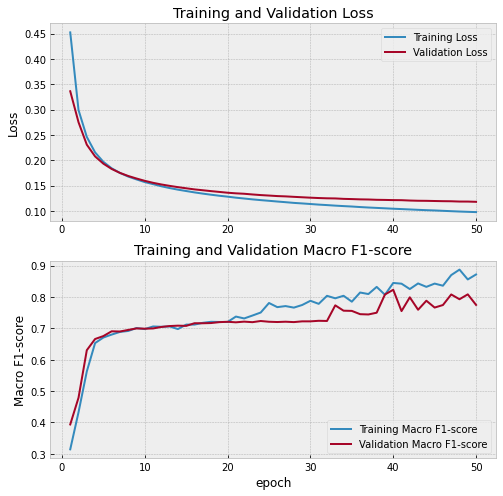

In [29]:
model_bce_losses, model_bce_val_losses, model_bce_macro_f1s, model_bce_val_macro_f1s = learning_curves(history_bce)

In [30]:
print("Macro soft-F1 loss: %.2f" %model_bce_val_losses[-1])
print("Macro F1-score: %.2f" %model_bce_val_macro_f1s[-1])

Macro soft-F1 loss: 0.12
Macro F1-score: 0.77


In [31]:
# Get all label names
label_names = mlb.classes_
# Performance table with the first model (macro soft-f1 loss)
grid = perf_grid(val_ds, y_val_bin, label_names, model)
# Performance table with the second model (binary cross-entropy loss)
grid_bce = perf_grid(val_ds, y_val_bin, label_names, model_bce)

In [32]:
grid_bce.head()

,id,label,freq,threshold,tp,fn,fp,precision,recall,f1
0,0,Card,0.76,0.00,738,0,233,0.760041,1.000000,0.863663
1,0,Card,0.76,0.01,732,6,229,0.761707,0.991870,0.861683
2,0,Card,0.76,0.02,717,21,228,0.758730,0.971545,0.852050
3,0,Card,0.76,0.03,710,28,227,0.757737,0.962060,0.847761
4,0,Card,0.76,0.04,699,39,222,0.758958,0.947154,0.842676


In [33]:
import seaborn as sns
# Get the maximum F1-score for each label when using the second model and varying the threshold
max_perf = grid_bce.groupby(['id', 'label', 'freq'])[['f1']].max().sort_values('f1', ascending=False).reset_index()
max_perf.rename(columns={'f1':'f1max_bce'}, inplace=True)
max_perf.style.background_gradient(subset=['freq', 'f1max_bce'], cmap=sns.light_palette("lightgreen", as_cmap=True))

,id,label,freq,f1max_bce
0,2,Front,0.890000,0.941689
1,0,Card,0.760000,0.863663
2,3,Page,0.240000,0.381667
3,4,back,0.110000,0.198516
4,1,DigiLocker,0.000000,0.054054


In [34]:
print("Correlation between label frequency and optimal F1 with bce: %.2f" %max_perf['freq'].corr(max_perf['f1max_bce']))

Correlation between label frequency and optimal F1 with bce: 1.00


In [35]:
top5 = max_perf.head(5)['id']

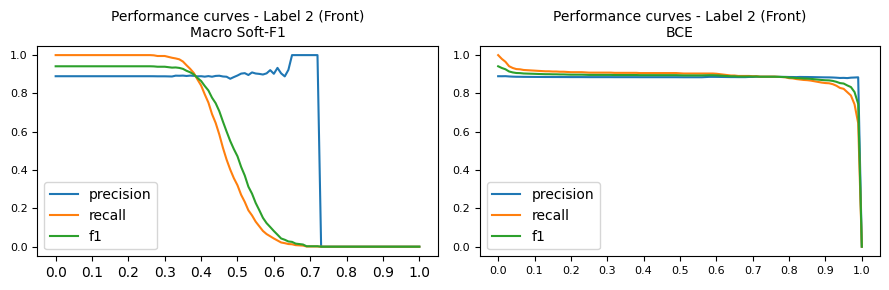

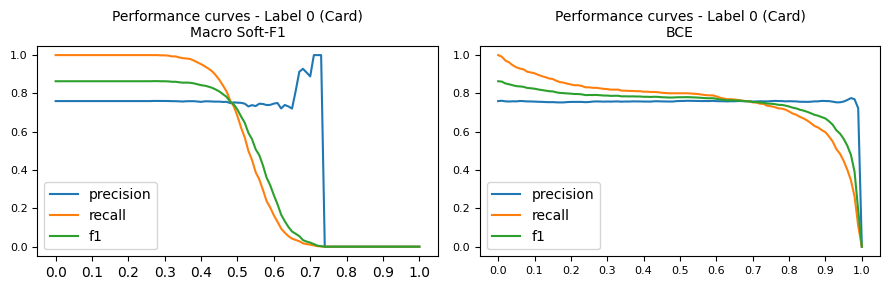

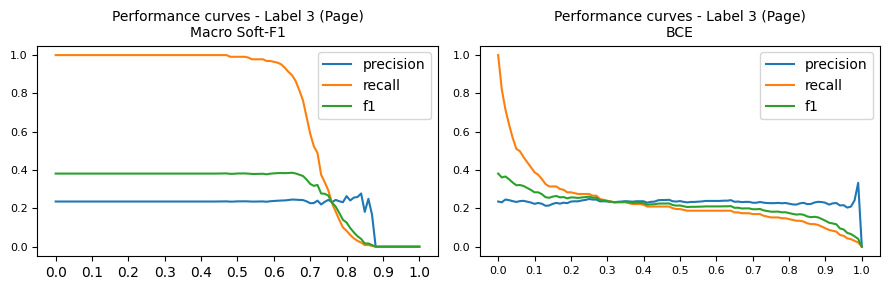

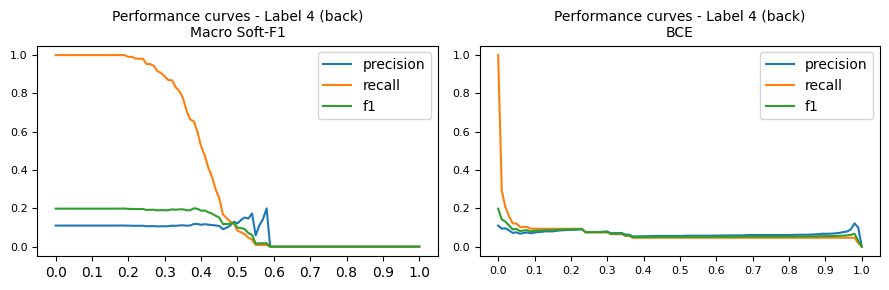

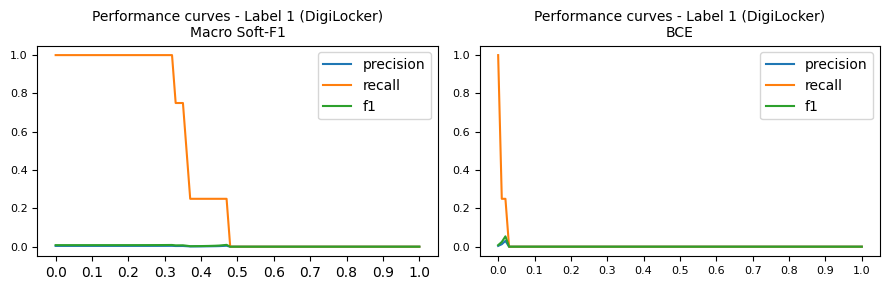

In [36]:
style.use("default")
for l in top5:
    
    label_grid = grid.loc[grid['id']==l, ['precision','recall','f1']]
    label_grid = label_grid.reset_index().drop('index', axis=1)
    
    label_grid_bce = grid_bce.loc[grid_bce['id']==l, ['precision','recall','f1']]
    label_grid_bce = label_grid_bce.reset_index().drop('index', axis=1)
    
    plt.figure(figsize=(9,3))

    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=10)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    label_grid.plot(ax=ax)
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    label_grid_bce.plot(ax=ax)
    
    plt.tight_layout()
    plt.show()
    

In [37]:
# Predict on the validation set with both models
y_hat_val = model.predict(val_ds)
y_hat_val_bce = model_bce.predict(val_ds)

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


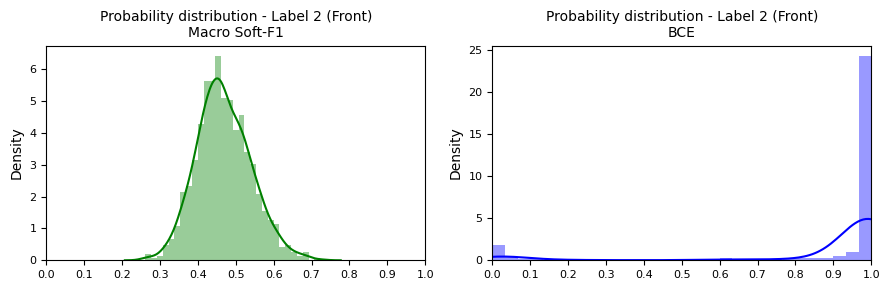

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


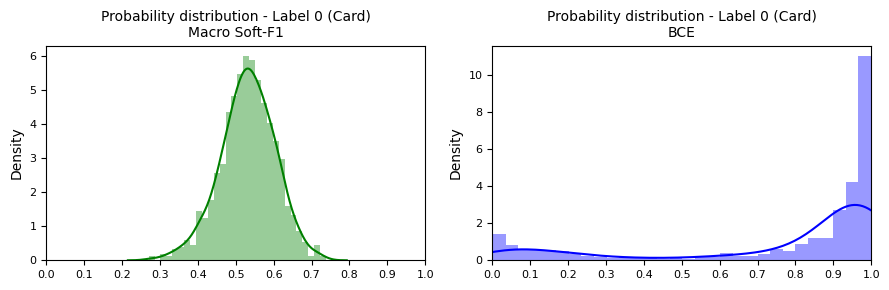

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


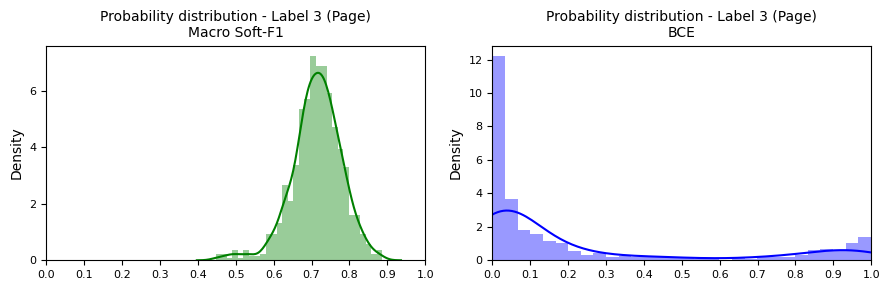

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


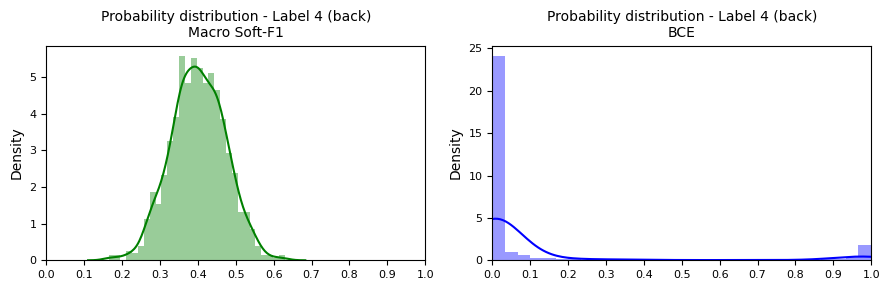

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


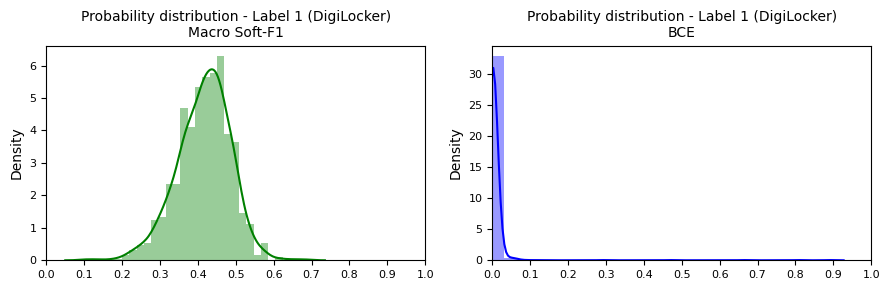

In [38]:
style.use("default")
for l in top5:
        
    plt.figure(figsize=(9,3))
    
    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val[:,l], bins=30, kde=True, color="g")
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val_bce[:,l], bins=30, kde=True, color="b")
    
    plt.tight_layout()
    plt.show()
    

In [39]:
def show_prediction(title, movies_df, model):
    
    # Get movie info
    img_path = os.path.join('multi_class_images/', title)
    
    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)

    # Generate prediction
    prediction = (model.predict(img) > 0.5).astype('int')
    prediction = pd.Series(prediction[0])
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values

    # Dispaly image with prediction
    style.use('default')
    plt.figure(figsize=(8,4))
    plt.imshow(Image.open(img_path))
    plt.title(list(prediction))
    plt.show()

In [40]:
titles = ["008e6476-ec4d-428a-ab68-69b022286d08_820291.jpg",
          "008e6476-ec4d-428a-ab68-69b022286d08_820299.jpg",
          "02c19447-c4c8-4945-9116-6d232d5308e7_819485.jpg",
          "03029226-766f-4abd-b5a2-28ede51bcced_819460.jpg",
          "92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg",
          "69ff563b-ccc3-4c66-aaf3-64f4656e7a40_817463.jpg",
         "7ecf4700-492a-44fb-8335-e9b1f1e69104_820997.jpg",
         "a5081444-da42-472c-b1de-409d19322c3e_820142.jpg",
         "557c27d9-06cb-47ac-8067-b3a3c964cff5_819755.jpg",
         "365faade-07eb-4385-82bb-7e904c544006_819479.jpg",
         "d9d995b5-f134-427d-9ae1-b655397f00cf_819039.jpg",]

for t in titles:
    show_prediction(t, df, model)

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'